In [60]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [61]:
#import datasets
import pathlib
data_dir=pathlib.Path("./archive/asl_alphabet_train/asl_alphabet_train/")
image_count= len(list(data_dir.glob('*/*.jpg')))
print(image_count)

87000


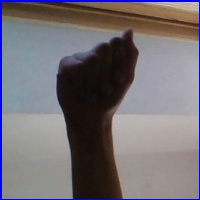

In [62]:
#Test image Printing 
A = list(data_dir.glob('A/*'))
PIL.Image.open(str(A[0]))

In [63]:
#load training image dataset into keras
batch_size = 32
img_height = 200
img_width = 200

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)




Found 87000 files belonging to 29 classes.
Using 69600 files for training.


In [64]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


In [65]:
#test print classification classes
class_names=train_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


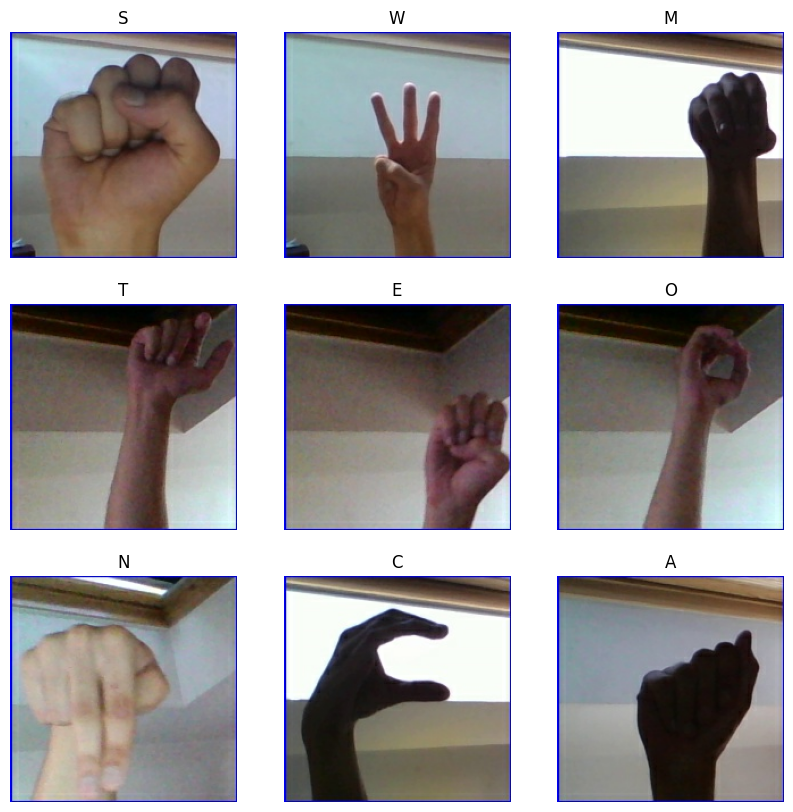

In [66]:
#Test print the dataset

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [67]:
#caching for preformance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [68]:
#NN Definition
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [69]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [71]:
epochs=1 #set to however many epochs for training
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

2175/2175 [==============================] - 808s 371ms/step - loss: 0.0914 - accuracy: 0.9698 - val_loss: 0.1515 - val_accuracy: 0.9481


In [72]:
!mkdir -p saved_model
model.save('saved_model/my_model')

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


INFO:tensorflow:Assets written to: saved_model/my_model\assets


INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [78]:
model.save('saved_model/my_model')

A subdirectory or file -p already exists.
Error occurred while processing: -p.


INFO:tensorflow:Assets written to: backup_model/my_model\assets


INFO:tensorflow:Assets written to: backup_model/my_model\assets


In [46]:
#model = tf.keras.models.load_model('saved_model/my_model')

In [73]:
import pathlib
val_data_dir=pathlib.Path("./archive/asl_alphabet_test/asl_alphabet_test/")
batch_size = 32
img_width= 200
img_height = 200


1/1 [==============================] - 0s 25ms/step
This image most likely belongs to A with a 100.00 percent confidence.
1/1 [==============================] - 0s 35ms/step
This image most likely belongs to B with a 100.00 percent confidence.
1/1 [==============================] - 0s 22ms/step
This image most likely belongs to C with a 100.00 percent confidence.
1/1 [==============================] - 0s 30ms/step
This image most likely belongs to D with a 100.00 percent confidence.
1/1 [==============================] - 0s 20ms/step
This image most likely belongs to E with a 99.99 percent confidence.
1/1 [==============================] - 0s 21ms/step
This image most likely belongs to F with a 100.00 percent confidence.
1/1 [==============================] - 0s 24ms/step
This image most likely belongs to G with a 99.58 percent confidence.
1/1 [==============================] - 0s 21ms/step
This image most likely belongs to H with a 100.00 percent confidence.
1/1 [=====================

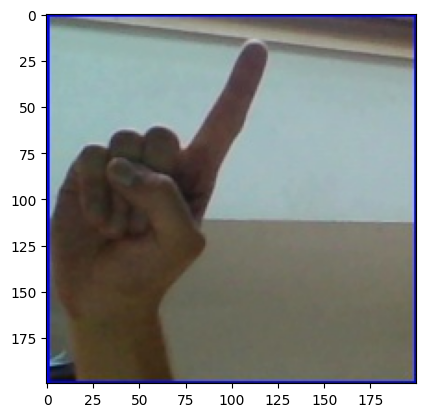

In [77]:
#from val_data_dir import image and predict
#for img in val_data_dir.iterdir():
#load one image
for img in val_data_dir.glob('*_test.jpg'):
    img = keras.preprocessing.image.load_img(
        img, target_size=(img_height, img_width)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    #show image and prediction
    plt.imshow(img)
    
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

    

